### Load libraries and data

In [101]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np 
pd.options.display.max_columns = 100
pd.options.display.max_rows = 16

Populating the interactive namespace from numpy and matplotlib


In [102]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib

matplotlib.style.use('ggplot')

In [103]:
#load store, train, test 
store  = pd.read_csv('./store.csv')
train  = pd.read_csv('./train.csv')
test  = pd.read_csv('./test.csv')

In [104]:
train = train.sort_values("Date")
test = test.sort_values("Date")

### Data info

In [105]:
def get_main_info(df, name):
    print "\n___%s___" % name
#     print df[:3]
    print "Shape:\n", df.shape
    print "Describe:\n", df.describe()
    print "\nNulls:\n", df.isnull().sum()
    print "\nUniques:"
    for column in df.columns:
        unique = df[column].unique() if df[column].nunique() <= 10 else ''
        print str(column), ": ", df[column].nunique(), " ", unique

def compare_dfs(train, test):
    columns = set(train.columns) & set(test.columns)
    print "\nCompare train and test:"
    for column in columns:
        if train[column].nunique() <= 10:
            print str(column), "for train: ", train[column].unique(), " for test: ", test[column].unique()
    
get_main_info(train, "Train")
get_main_info(test, "Test")
# get_main_info(store, "Store")
compare_dfs(train, test)


___Train___
Shape:
(1017209, 9)
Describe:
                Store       DayOfWeek           Sales       Customers  \
count  1017209.000000  1017209.000000  1017209.000000  1017209.000000   
mean       558.429727        3.998341     5773.818972      633.145946   
std        321.908651        1.997391     3849.926175      464.411734   
min          1.000000        1.000000        0.000000        0.000000   
25%        280.000000        2.000000     3727.000000      405.000000   
50%        558.000000        4.000000     5744.000000      609.000000   
75%        838.000000        6.000000     7856.000000      837.000000   
max       1115.000000        7.000000    41551.000000     7388.000000   

                 Open           Promo   SchoolHoliday  
count  1017209.000000  1017209.000000  1017209.000000  
mean         0.830107        0.381515        0.178647  
std          0.375539        0.485759        0.383056  
min          0.000000        0.000000        0.000000  
25%          1.0000

### Add date

In [106]:
def add_date(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df['year'] = df.Date.dt.year
    df['month'] = df.Date.dt.month
    df['day'] = df.Date.dt.day
    df['dayofweek'] = df.Date.dt.dayofweek
    df['dayofyear'] = df.Date.dt.dayofyear

add_date(train, 'Date')
add_date(test, 'Date')

### Replase nan

In [107]:
test['Open'].fillna(1, inplace=True)
store.fillna(0, inplace=True)
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

### Add features

In [108]:
store['PromoInterval'].fillna('', inplace=True)
store['PromoInterval'] = store['PromoInterval'].replace(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
                                                        ['1,4,7,10', '2,5,8,11', '3,6,9,12'])
store['StoreType'] = store['StoreType'].replace(['a', 'b', 'c', 'd'], [1, 2, 3, 4])
store['Assortment'] = store['Assortment'].replace(['a', 'b', 'c', 'd'], [1, 2, 3, 4])

In [109]:
train = train.merge(store, how='left', on='Store')
test = test.merge(store, how='left', on='Store')

In [110]:
print train['month'].unique()
# print train['PromoInterval'].unique()
train['compressed']=train.apply(lambda x: str(x['month']) in set(x['PromoInterval'].split(',')) if x['PromoInterval'] else False, axis=1)
test['compressed']=test.apply(lambda x: str(x['month']) in set(x['PromoInterval'].split(',')) if x['PromoInterval'] else False, axis=1)

# print train['compressed'].unique()
# print train['compressed'].value_counts()

[ 1  2  3  4  5  6  7  8  9 10 11 12]


### Data statistics

In [111]:
st = test.groupby(['Store'])['Date'].count().reset_index()
print st['Date'].value_counts()

48    856
Name: Date, dtype: int64


In [112]:
st = train.groupby(['Store'])['Date'].count().reset_index()
print st['Date'].value_counts()
lst = st[st['Date']==758]['Store'].tolist()
print lst

942    934
758    180
941      1
Name: Date, dtype: int64
[13, 20, 22, 32, 36, 41, 46, 51, 52, 58, 72, 76, 81, 89, 99, 100, 108, 113, 115, 127, 129, 132, 136, 137, 139, 144, 145, 149, 155, 159, 164, 165, 172, 174, 181, 183, 186, 190, 191, 192, 204, 215, 218, 231, 243, 258, 263, 275, 277, 279, 283, 284, 287, 288, 298, 306, 317, 342, 345, 348, 365, 385, 399, 407, 412, 413, 420, 427, 428, 429, 430, 434, 457, 471, 477, 485, 490, 492, 498, 500, 501, 512, 514, 518, 522, 534, 539, 540, 542, 547, 555, 571, 573, 575, 587, 598, 604, 611, 612, 619, 620, 629, 633, 636, 637, 638, 644, 646, 650, 660, 669, 670, 671, 677, 684, 694, 701, 702, 706, 710, 711, 712, 716, 719, 736, 739, 744, 750, 766, 771, 775, 778, 797, 804, 805, 806, 815, 820, 825, 842, 851, 858, 859, 879, 884, 890, 893, 900, 902, 903, 904, 909, 915, 919, 920, 932, 941, 952, 974, 977, 989, 1000, 1004, 1009, 1012, 1019, 1027, 1038, 1041, 1049, 1056, 1065, 1067, 1080, 1092, 1094, 1102, 1104, 1107, 1109]


In [113]:
print train['SchoolHoliday'].value_counts()
print test['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64
0    22866
1    18222
Name: SchoolHoliday, dtype: int64


In [114]:
print train['Promo'].value_counts()
print test['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64
0    24824
1    16264
Name: Promo, dtype: int64


In [115]:
print train['compressed'].value_counts()
print test['compressed'].value_counts()
print train['PromoInterval'].value_counts()
print test['PromoInterval'].value_counts()

False    842417
True     174792
Name: compressed, dtype: int64
False    35852
True      5236
Name: compressed, dtype: int64
0           508031
1,4,7,10    293122
2,5,8,11    118596
3,6,9,12     97460
Name: PromoInterval, dtype: int64
0           17232
1,4,7,10    13776
2,5,8,11     5712
3,6,9,12     4368
Name: PromoInterval, dtype: int64


In [116]:
print train['StateHoliday'].value_counts()
print train['StateHoliday'].unique()
# 0 == NaN
print test['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
['a' '0' 'b' 'c' 0]
0    40908
a      180
Name: StateHoliday, dtype: int64


In [117]:
train_store = set(train['Store'].unique())
test_store = set(test['Store'].unique())
diff_lst = list(train_store - test_store)
# print sort(diff_lst) 
622 in test_store

True

In [118]:
wpr = train[train['Promo'] == 0]['Sales'] / train[train['Promo'] == 0]['Customers']
wopr = train[train['Promo'] == 1]['Sales'] / train[train['Promo'] == 1]['Customers']
print "___Mean___"
print "Customers Promo==0: ", train[train['Promo'] == 0]['Customers'].mean()
print "Customers Promo==1: ", train[train['Promo'] == 1]['Customers'].mean()
print "Sales Promo==0: ", train[train['Promo'] == 0]['Sales'].mean()
print "Sales Promo==1: ",train[train['Promo'] == 1]['Sales'].mean()
print "Sales PromoInterval==0: ", train[train['compressed'] == 0]['Sales'].mean()
print "Sales PromoInterval==1: ",train[train['compressed'] == 1]['Sales'].mean()
print "Sales PromoInterval empty: ", train[train['PromoInterval'] == 0]['Sales'].mean()
print "Sales PromoInterval2 full: ",train[train['PromoInterval'] != 0]['Sales'].mean()
print wpr.mean()
print wopr.mean()
print "___Median___"
print "Customers Promo==0: ", train[train['Promo'] == 0]['Customers'].median()
print "Customers Promo==1: ", train[train['Promo'] == 1]['Customers'].median()
print "Sales Promo==0: ", train[train['Promo'] == 0]['Sales'].median()
print "Sales Promo==1: ",train[train['Promo'] == 1]['Sales'].median()
print "Sales PromoInterval==0: ", train[train['compressed'] == 0]['Sales'].median()
print "Sales PromoInterval==1: ",train[train['compressed'] == 1]['Sales'].median()
print wpr.median()
print wopr.median()

___Mean___
Customers Promo==0:  517.823541754
Customers Promo==1:  820.098814677
Sales Promo==0:  4406.05080516
Sales Promo==1:  7991.15204597
Sales PromoInterval==0:  5852.65494761
Sales PromoInterval==1:  5393.86585198
Sales PromoInterval empty:  6124.71016139
Sales PromoInterval2 full:  5423.71821838
8.94112769672
10.1789068922
___Median___
Customers Promo==0:  512.0
Customers Promo==1:  747.0
Sales Promo==0:  4622.0
Sales Promo==1:  7553.0
Sales PromoInterval==0:  5807.0
Sales PromoInterval==1:  5469.0
8.74159663866
9.95694716243


In [119]:
print train[(train['Open'] == 1) & (train['Sales'] == 0)]['Open'].value_counts()
print train[(train['Open'] == 1) & (train['Customers'] == 0)]['Open'].value_counts()

1    54
Name: Open, dtype: int64
1    52
Name: Open, dtype: int64


In [120]:
print store['StoreType'].value_counts()
print store['Assortment'].value_counts()
print store['PromoInterval'].value_counts()


1    602
4    348
3    148
2     17
Name: StoreType, dtype: int64
1    593
3    513
2      9
Name: Assortment, dtype: int64
0           544
1,4,7,10    335
2,5,8,11    130
3,6,9,12    106
Name: PromoInterval, dtype: int64


### Plot data

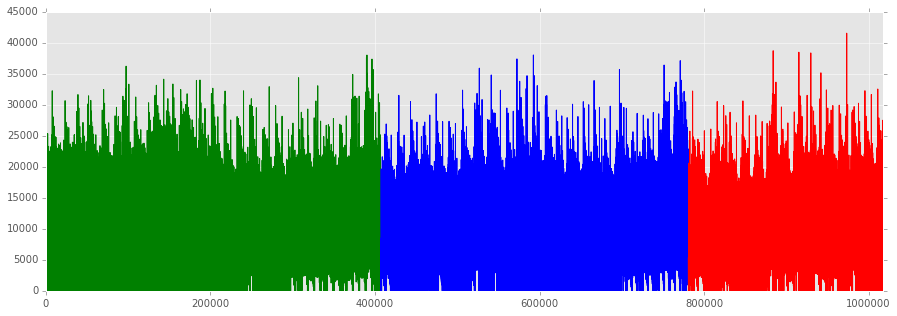

In [122]:
train[train['year'] == 2013].Sales.plot(color='g')
train[train['year'] == 2014].Sales.plot(color='b')
train[train['year'] == 2015].Sales.plot(color='r')
figsize(15, 5)

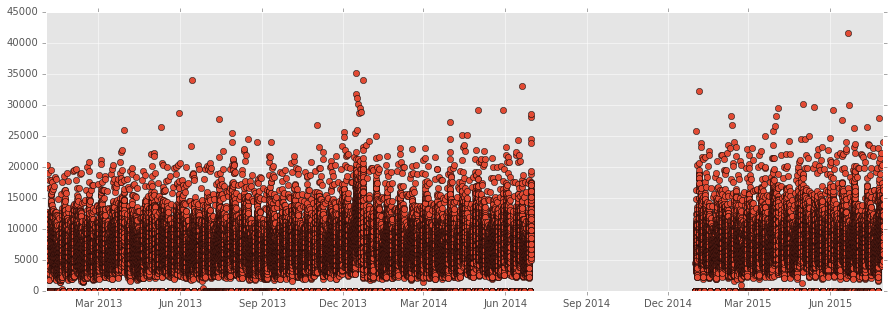

In [179]:
fig, ax = plt.subplots()
fig = fig.set_size_inches(15, 5)
strng_store = train[train['Store'].isin(lst)]
ax.plot_date(strng_store['Date'], strng_store['Sales'])

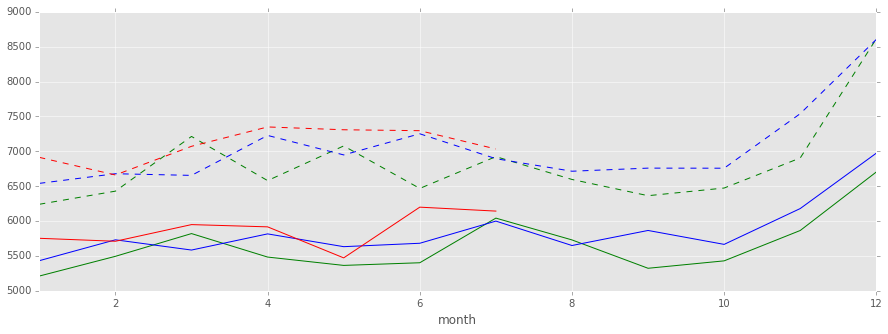

In [125]:
train[train['year'] == 2013].groupby('month')['Sales'].mean().plot(color='g')
train[train['year'] == 2014].groupby('month')['Sales'].mean().plot(color='b')
train[train['year'] == 2015].groupby('month')['Sales'].mean().plot(color='r')

train[(train['year'] == 2013) & (train['Sales'] > 0)].groupby('month')['Sales'].mean().plot(color='g', style='--')
train[(train['year'] == 2014) & (train['Sales'] > 0)].groupby('month')['Sales'].mean().plot(color='b', style='--')
train[(train['year'] == 2015) & (train['Sales'] > 0)].groupby('month')['Sales'].mean().plot(color='r', style='--')


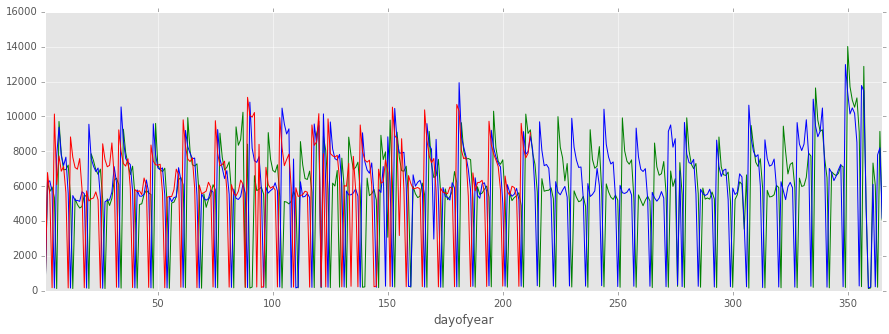

In [126]:
train[train['year'] == 2013].groupby('dayofyear')['Sales'].mean().plot(color='g')
train[train['year'] == 2014].groupby('dayofyear')['Sales'].mean().plot(color='b')
train[train['year'] == 2015].groupby('dayofyear')['Sales'].mean().plot(color='r')

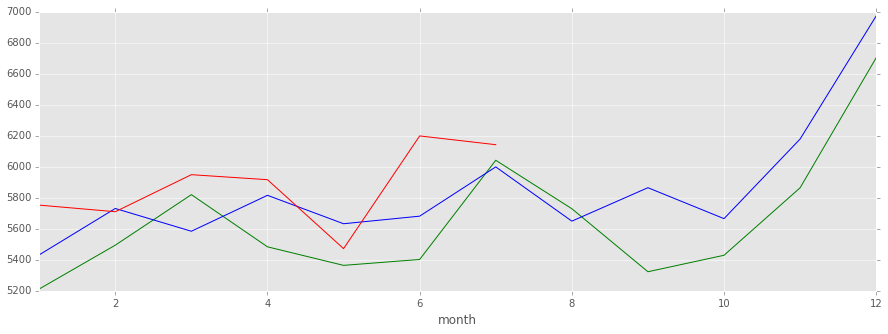

In [183]:
train[train['year'] == 2013].groupby('month')['Sales'].mean().plot(color='g')
train[train['year'] == 2014].groupby('month')['Sales'].mean().plot(color='b')
train[train['year'] == 2015].groupby('month')['Sales'].mean().plot(color='r')

(-1, 25000)

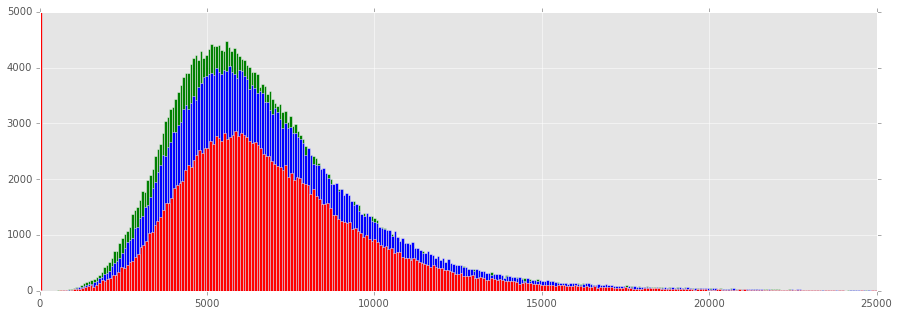

In [127]:
figsize(15, 5)
ax = train[train['year'] == 2013]['Sales'].hist(bins=500, color='g')
train[train['year'] == 2014]['Sales'].hist(bins=500, color='b')
train[train['year'] == 2015]['Sales'].hist(bins=500, color='r')

ax.set_ylim(0, 5000)
ax.set_xlim(-1, 25000)

(-1, 5000)

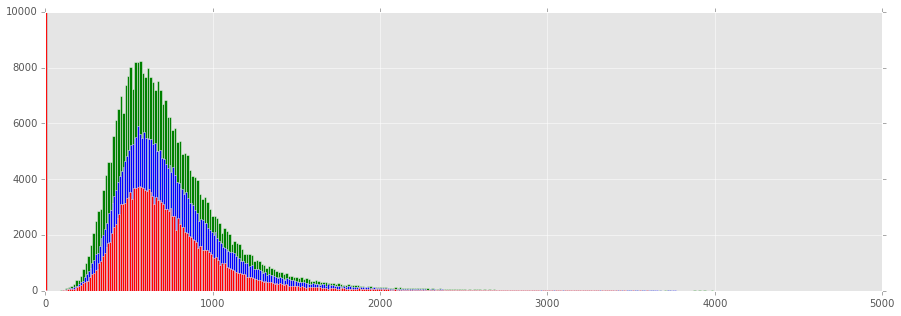

In [128]:
figsize(15, 5)
ax = train[train['year'] == 2013]['Customers'].hist(bins=500, color='g')
train[train['year'] == 2014]['Customers'].hist(bins=500, color='b')
train[train['year'] == 2015]['Customers'].hist(bins=500, color='r')

ax.set_ylim(0, 10000)
ax.set_xlim(-1, 5000)

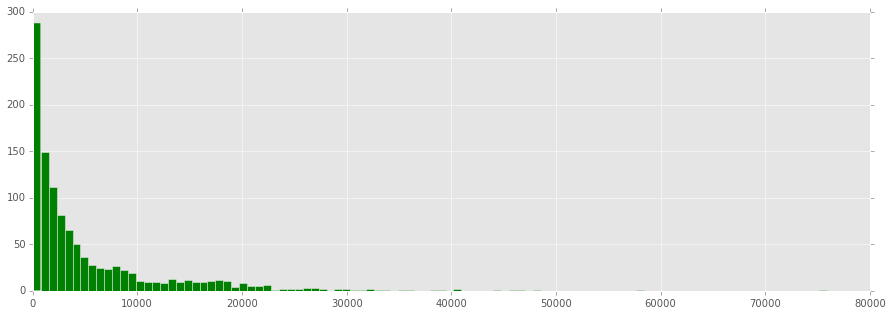

In [129]:
figsize(15, 5)
ax = store['CompetitionDistance'].hist(bins=100, color='g')

### Day of week

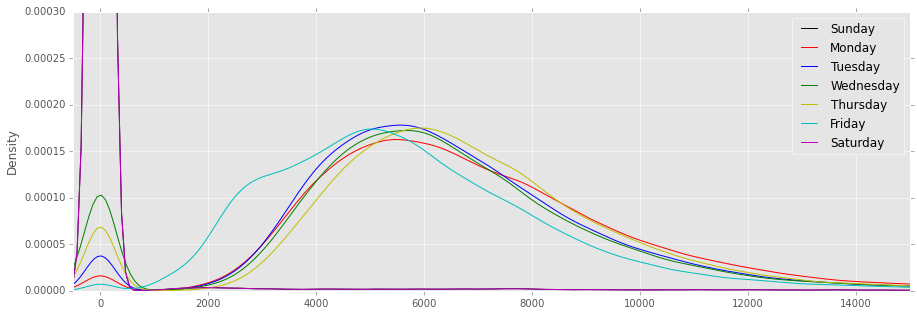

In [130]:
cols = ['r','b','g','y','c','m','k']

ax = train[train['DayOfWeek']==7]['Sales'].plot(kind='kde', color=cols[6])
for d in xrange(6):
    train[train['dayofweek']==(d+1)]['Sales'].plot(kind='kde', color=cols[d])
ax.set_xlim(-500, 15000)
ax.set_ylim(0, 0.0003)
ax.legend([u'Sunday',u'Monday',u'Tuesday',u'Wednesday',u'Thursday',u'Friday',u'Saturday'])

### Week

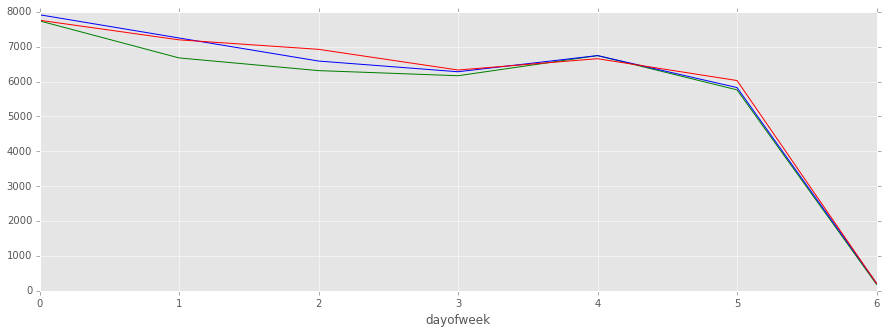

In [143]:
train[train['year'] == 2013].groupby('dayofweek')['Sales'].mean().plot(color='g')
train[train['year'] == 2014].groupby('dayofweek')['Sales'].mean().plot(color='b')
train[train['year'] == 2015].groupby('dayofweek')['Sales'].mean().plot(color='r')

### Store

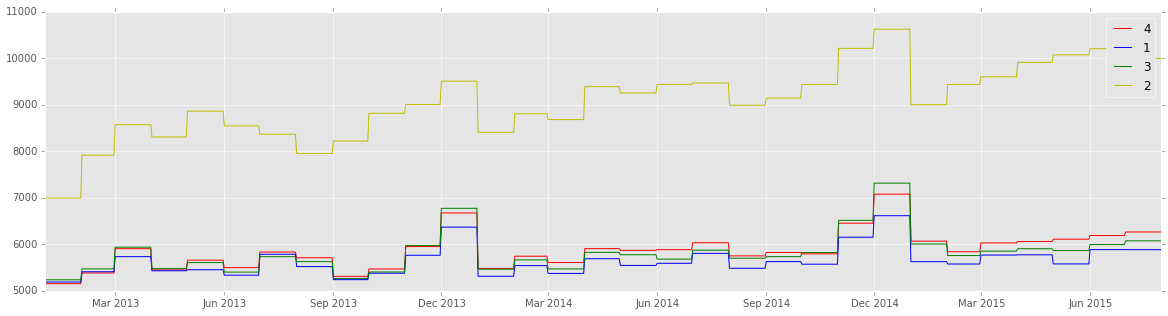

In [176]:
cols = ['r','b','g','y','c','m']
# train.groupby('StoreType')['Sales'].mean().plot(color='b')

fig, ax = plt.subplots()
leg = []
fig = fig.set_size_inches(20, 5)
for elem in train['StoreType'].unique():
    st_store = train[train['StoreType']==elem]
    st_md = st_store.groupby(['year', 'month'])['Sales'].median().reset_index()
    st_md.rename(columns={'Sales':'median'}, inplace=True)
    st_store = pd.merge(st_store, st_md, on = ['year', 'month'], how='left')
    ax.plot_date(st_store['Date'], st_store['median'], cols[len(leg)], ls='solid')
    leg.append(elem)
    
ax.legend(leg)

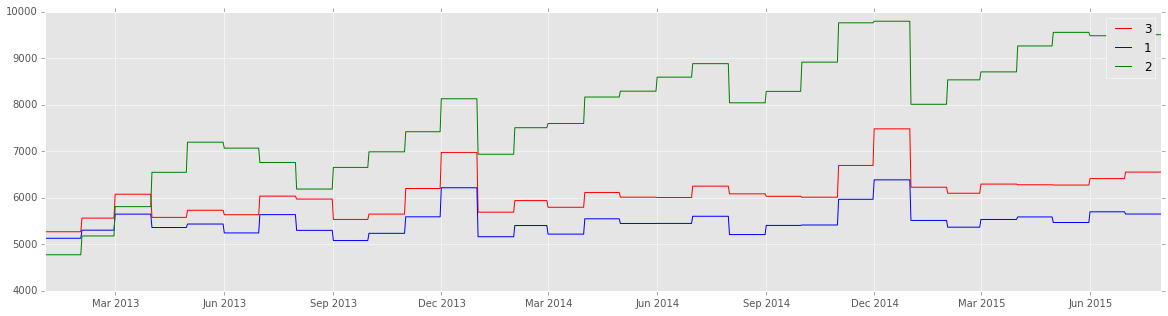

In [178]:
cols = ['r','b','g','y','c','m']
# train.groupby('StoreType')['Sales'].mean().plot(color='b')

fig, ax = plt.subplots()
leg = []
fig = fig.set_size_inches(20, 5)
for elem in train['Assortment'].unique():
    st_store = train[train['Assortment']==elem]
    st_md = st_store.groupby(['year', 'month'])['Sales'].median().reset_index()
    st_md.rename(columns={'Sales':'median'}, inplace=True)
    st_store = pd.merge(st_store, st_md, on = ['year', 'month'], how='left')
    ax.plot_date(st_store['Date'], st_store['median'], cols[len(leg)])
    leg.append(elem)
    
ax.legend(leg)